In [54]:
import pandas as pd
import os
import numpy as np
%load_ext autoreload
%autoreload 2
import pipeline as py
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, SCORERS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11, 4)})

## Reading the Data

In [3]:
claims = py.read_all(False)

In [4]:
claims.head(2)

,reimb2010,reimb2008,reimb2009,age2010,male,heart.failure,kidney,cancer,copd,depression,...,acuity,costTrend,monthsWithClaims,race_Black,race_Hispanic,race_Other,race_White,log(reimb2010+1),log(reimb2009+1),log(reimb2008+1)
0,390,320.0,360,97,0,0,0,0,0,0,...,0.235294,-0.018856,9,0,0,0,1,2.592177,2.557507,2.506505
1,970,58800.0,2740,79,0,1,1,0,1,0,...,0.853591,-0.027265,21,0,0,0,1,2.987219,3.437909,4.769385


## Data Preperation

In [5]:
train, test = py.train_test(claims, 0.2, random_ = 5597)

In [6]:
pd.set_option("display.max_columns", None)

In [7]:
claims.head()

,reimb2010,reimb2008,reimb2009,age2010,male,heart.failure,kidney,cancer,copd,depression,diabetes,ihd,osteoporosis,arthritis,stroke,InpatientClaims,OutpatientClaims,OfficeVisit,EyeExam,EKG,xray,CTScan,PhysicalTherapy,Ambulance,acuity,costTrend,monthsWithClaims,race_Black,race_Hispanic,race_Other,race_White,log(reimb2010+1),log(reimb2009+1),log(reimb2008+1)
0,390,320.0,360,97,0,0,0,0,0,0,1,1,0,0,0,0,0,4,1,0,1,0,0,0,0.235294,-0.018856,9,0,0,0,1,2.592177,2.557507,2.506505
1,970,58800.0,2740,79,0,1,1,0,1,0,1,1,0,0,1,1,10,12,0,2,8,1,0,1,0.853591,-0.027265,21,0,0,0,1,2.987219,3.437909,4.769385
2,5630,510.0,1580,87,0,1,0,0,0,0,1,1,0,0,0,0,2,10,0,1,2,1,1,0,0.175115,0.496742,20,0,0,0,1,3.750586,3.198932,2.708421
3,3480,2930.0,49330,79,0,1,1,0,1,1,1,1,1,1,0,3,7,14,1,1,6,4,3,3,0.709147,0.214955,19,0,0,0,1,3.541704,4.693120,3.467016
4,920,1500.0,1650,85,1,1,0,1,0,0,1,0,0,1,0,0,0,16,2,1,3,0,1,0,0.174603,0.231568,21,0,0,0,1,2.964260,3.217747,3.176381


In [8]:
py.fill_all_missing(claims)

In [9]:
cols_norm = ["age2010", "OfficeVisit", "EyeExam", "EKG", "xray", "CTScan", "PhysicalTherapy",
             "Ambulance", "acuity", "costTrend", "monthsWithClaims", 
             "log(reimb2010+1)", "log(reimb2009+1)", "log(reimb2008+1)"]

In [10]:
train_n, test_n = py.normalize(train, test, cols_norm)

In [11]:
train_n.head(2)

,reimb2010,reimb2008,reimb2009,age2010,male,heart.failure,kidney,cancer,copd,depression,diabetes,ihd,osteoporosis,arthritis,stroke,InpatientClaims,OutpatientClaims,OfficeVisit,EyeExam,EKG,xray,CTScan,PhysicalTherapy,Ambulance,acuity,costTrend,monthsWithClaims,race_Black,race_Hispanic,race_Other,race_White,log(reimb2010+1),log(reimb2009+1),log(reimb2008+1)
94448,110,2090.0,1760,-0.094881,1,1,0,0,0,0,1,1,1,1,1,0,9,0.721826,0.526405,0.317514,1.172542,0.745774,0.656585,-0.384909,-0.867864,-0.166693,0.930400,0,0,0,1,-0.489012,0.243788,0.434929
82322,0,330.0,350,-3.647940,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.040738,-0.685207,-0.759058,-0.480362,0.054735,-0.634844,-0.070351,0.369275,-0.506059,-1.051994,0,0,0,1,-2.126832,-0.311882,-0.152792


In [12]:
train_features = train_n.loc[:,'age2010':'log(reimb2008+1)'].drop(columns = ["log(reimb2010+1)"])
train_targets = train.loc[:,'log(reimb2010+1)']
test_features = test_n.loc[:,'age2010':'log(reimb2008+1)'].drop(columns = ["log(reimb2010+1)"])
test_targets = test.loc[:,"log(reimb2010+1)"]

In [13]:
train_features.head(2)

,age2010,male,heart.failure,kidney,cancer,copd,depression,diabetes,ihd,osteoporosis,arthritis,stroke,InpatientClaims,OutpatientClaims,OfficeVisit,EyeExam,EKG,xray,CTScan,PhysicalTherapy,Ambulance,acuity,costTrend,monthsWithClaims,race_Black,race_Hispanic,race_Other,race_White,log(reimb2009+1),log(reimb2008+1)
94448,-0.094881,1,1,0,0,0,0,1,1,1,1,1,0,9,0.721826,0.526405,0.317514,1.172542,0.745774,0.656585,-0.384909,-0.867864,-0.166693,0.930400,0,0,0,1,0.243788,0.434929
82322,-3.647940,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.040738,-0.685207,-0.759058,-0.480362,0.054735,-0.634844,-0.070351,0.369275,-0.506059,-1.051994,0,0,0,1,-0.311882,-0.152792


In [14]:
ev = {}

In [15]:
def metrics(target_predict,test_targets,train_features,train_targets,regr,output=True):
    
    bias = mean_squared_error(regr.predict(train_features),train_targets)
    mse = mean_squared_error(target_predict,test_targets)
    rss = np.sum((target_predict - test_targets) ** 2)
    variance = regr.score(train_features, train_targets)
    
    if output:
        print("Bias: %.2f" % bias)   
        print("Mean squared error: %.2f" % mse)
        print("RSS: %.2f" % rss)
        print('Variance score: %.2f\n' % variance)
    
    return(bias,mse,rss,variance)

## Lasso Regression

In [123]:
ls = linear_model.Lasso()
params_lasso = {'alpha':[0.9, 0.7, 0.5, 0.25, 0.1]}
Lasso_GS = GridSearchCV(ls, param_grid=params_lasso, n_jobs=-1, scoring='r2')
Lasso_GS.fit(train_features,train_targets)
best_lasso = Lasso_GS.best_params_

In [124]:
models = [x["alpha"] for x in Lasso_GS.cv_results_["params"]]
scores = [x for x in Lasso_GS.cv_results_["mean_test_score"]]

Text(0, 0.5, 'R2 Score')

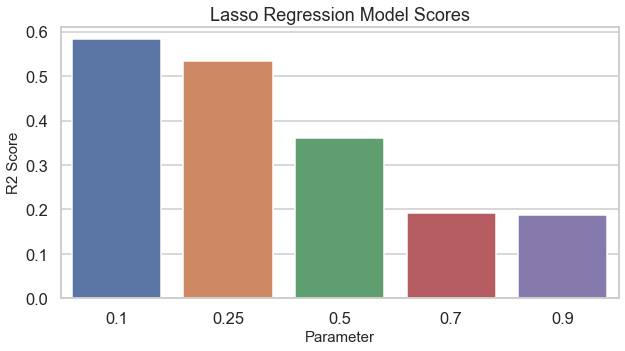

In [125]:
sns.set("talk")
sns.set_style("whitegrid")
ax = sns.barplot(x=models, y=scores)
plt.title("Lasso Regression Model Scores")
plt.xlabel("Parameter", size=15)
plt.ylabel("R2 Score", size=15)

In [126]:
print(list(train_features), '\n\n')
ls = linear_model.Lasso(alpha=best_lasso["alpha"])
ls.fit(train_features,train_targets)
target_predict = ls.predict(test_features)
print('{}\n'.format(ls.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White', 'log(reimb2009+1)', 'log(reimb2008+1)'] 


[ 0.         -0.          0.          0.         -0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.0072357   0.          0.          0.          0.
  0.          0.         -0.         -0.          0.          0.35199893
 -0.         -0.         -0.          0.          0.36977441  0.14449904]



In [127]:
ev["Lasso"] = metrics(target_predict,test_targets,train_features,train_targets,ls)

Bias: 0.65
Mean squared error: 0.65
RSS: 133551.25
Variance score: 0.58



In [128]:
coefs = ls.coef_

In [129]:
train_features_cols = list(train_features)

In [130]:
coef_results = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs)), orient = "index", columns = ["Coef"]).reset_index()

In [131]:
coef_results.rename(columns = {"index": "variable"}, inplace = True)

In [169]:
coef_results["Abs"] = coef_results["Coef"].apply(lambda row: abs(row))

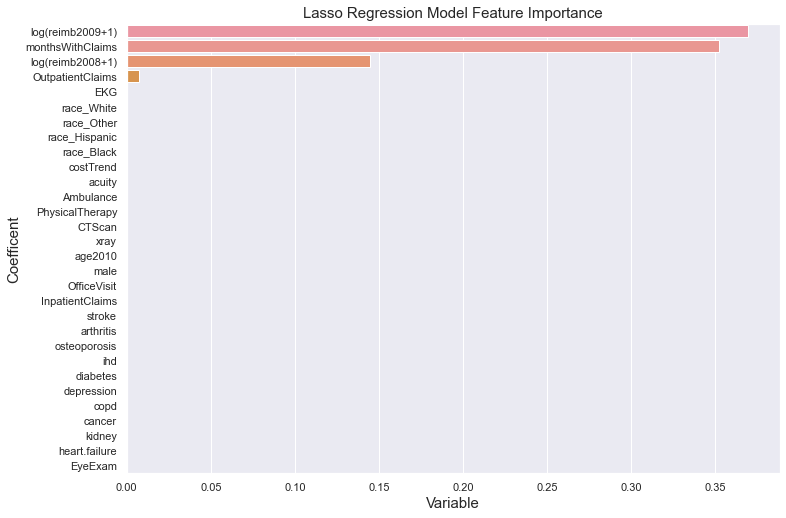

In [170]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results, 
            order=coef_results.sort_values('Coef', ascending = False)["variable"])
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)
plt.title("Lasso Regression Model Feature Importance", size=15)
plt.savefig('L_feature_imp.jpg')

## Ridge Regression

In [133]:
rg = linear_model.Ridge()
params_Ridge = {'alpha':[0.9, 0.7, 0.5, 0.25, 0.1]}
Ridge_GS = GridSearchCV(rg, param_grid=params_Ridge, n_jobs=-1, scoring='r2', cv = 5)
Ridge_GS.fit(train_features,train_targets)
best_rigde = Ridge_GS.best_params_

In [134]:
rg = linear_model.Ridge(alpha = best_rigde["alpha"])
print(list(train_features), '\n\n')
rg.fit(train_features,train_targets)
target_predict = rg.predict(test_features)
print('{}\n'.format(rg.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White', 'log(reimb2009+1)', 'log(reimb2008+1)'] 


[ 6.25310806e-03 -8.16572077e-03  2.76291018e-03 -1.25265997e-02
 -1.74379600e-02 -4.47332249e-03  4.55168362e-04  3.58753843e-02
  3.73465639e-02 -3.40035876e-04 -6.45062386e-04 -3.14312983e-02
 -7.82344703e-02 -2.43818204e-03 -5.72543169e-02 -1.84932869e-02
 -4.51191166e-03 -8.06105998e-03 -2.07853366e-03 -1.01690336e-02
  4.88804494e-03 -1.05275106e-01  6.44850411e-02  3.09457257e-01
 -3.88319010e-03 -4.81423154e-03 -7.94207165e-03  1.66394936e-02
  4.62661546e-01  3.37586271e-01]



In [135]:
models_r = [x["alpha"] for x in Ridge_GS.cv_results_["params"]]
scores_r = [x for x in Ridge_GS.cv_results_["mean_test_score"]]

Text(0, 0.5, 'R2 Score')

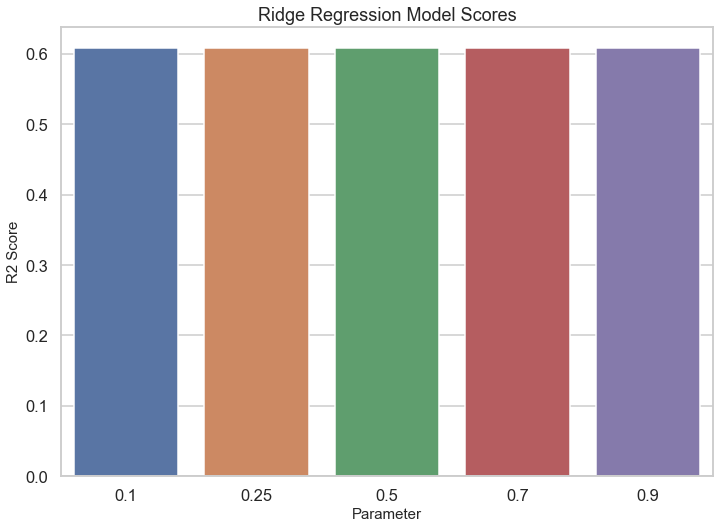

In [136]:
sns.set("talk")
sns.set_style("whitegrid")
ax = sns.barplot(x=models_r, y=scores_r)
plt.title("Ridge Regression Model Scores")
plt.xlabel("Parameter", size=15)
plt.ylabel("R2 Score", size=15)

In [137]:
coefs_r = rg.coef_

In [138]:
coef_results_r = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs_r)),
                                        orient = "index", columns = ["Coef"]).reset_index()

In [139]:
coef_results_r.rename(columns = {"index": "variable"}, inplace = True)

In [160]:
coef_results_r["Abs"] = coef_results_r["Coef"].apply(lambda row: abs(row))

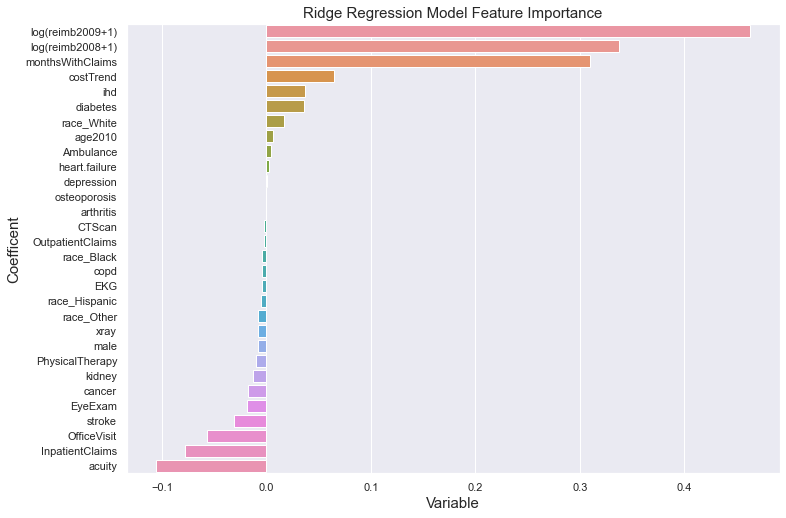

In [166]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results_r, 
            order=coef_results_r.sort_values('Coef', ascending = False)["variable"])
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)
plt.title("Ridge Regression Model Feature Importance", size=15)
plt.savefig('R_feature_imp.jpg')

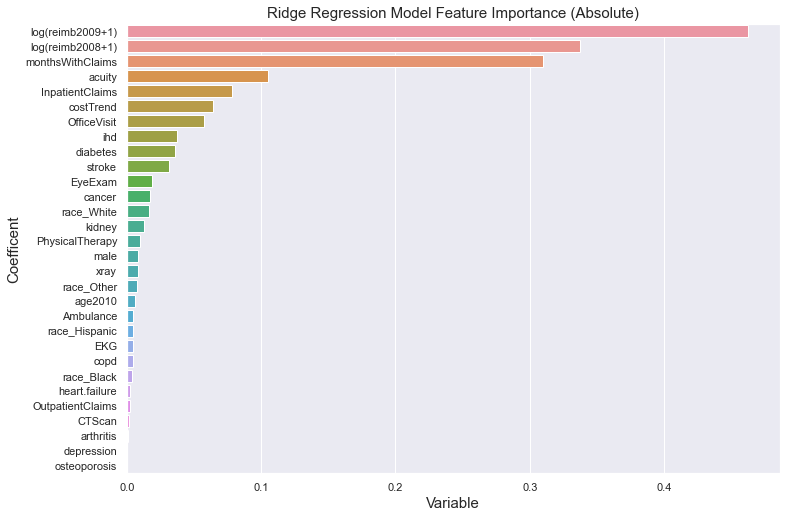

In [167]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Abs", data = coef_results_r, 
            order=coef_results_r.sort_values('Abs', ascending = False)["variable"])
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)
plt.title("Ridge Regression Model Feature Importance (Absolute)", size=15)
plt.savefig('R_feature_imp_abs.jpg')

In [141]:
ev["Ridge"] = metrics(target_predict,test_targets,train_features,train_targets,rg)

Bias: 0.61
Mean squared error: 0.61
RSS: 125466.20
Variance score: 0.61



## Elastic Net

In [142]:
EN = linear_model.ElasticNet()
params_EN = {'alpha':[0.9, 0.7, 0.5, 0.25, 0.1]}
EN_GS = GridSearchCV(EN, param_grid=params_EN, n_jobs=-1, scoring='r2')
EN_GS.fit(train_features,train_targets)
best_EN = EN_GS.best_params_

In [143]:
models_e = [x["alpha"] for x in EN_GS.cv_results_["params"]]
scores_e = [x for x in EN_GS.cv_results_["mean_test_score"]]

Text(0, 0.5, 'R2 Score')

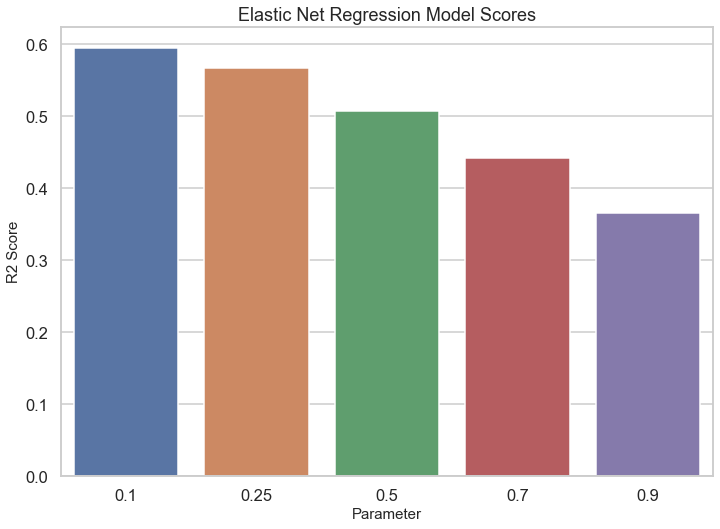

In [144]:
sns.set("talk")
sns.set_style("whitegrid")
ax = sns.barplot(x=models_e, y=scores_e)
plt.title("Elastic Net Regression Model Scores")
plt.xlabel("Parameter", size=15)
plt.ylabel("R2 Score", size=15)


In [145]:
print(list(train_features), '\n\n')
en = linear_model.ElasticNet(alpha=best_EN["alpha"])
en.fit(train_features,train_targets)
target_predict = en.predict(test_features)
print('{}\n'.format(en.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White', 'log(reimb2009+1)', 'log(reimb2008+1)'] 


[ 0.         -0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.01976952  0.00449972  0.          0.         -0.         -0.
 -0.          0.         -0.         -0.02697682  0.02895067  0.31687231
 -0.         -0.         -0.          0.          0.37238074  0.23921975]



In [146]:
coefs_en = en.coef_

In [147]:
coef_results_en = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs_en)),
                                         orient = "index", columns = ["Coef"]).reset_index()

In [148]:
coef_results_en.rename(columns = {"index": "variable"}, inplace = True)

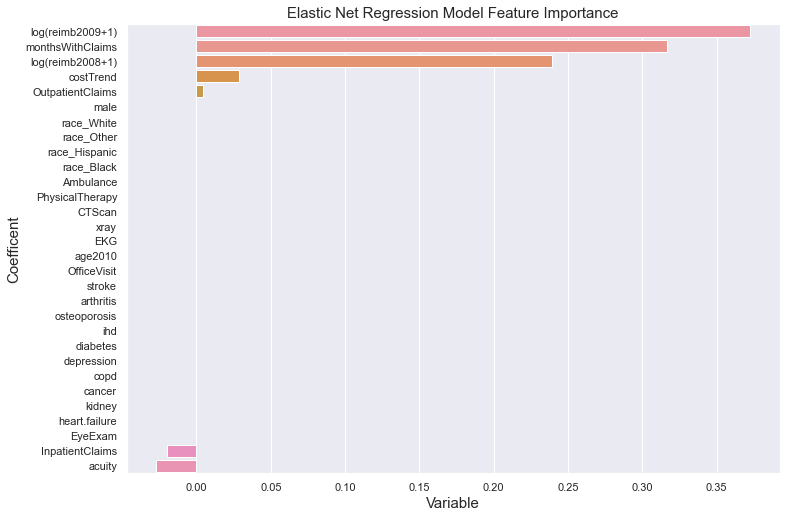

In [159]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results_en, 
            order=coef_results_en.sort_values('Coef', ascending = False)["variable"])
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)
plt.title("Elastic Net Regression Model Feature Importance", size=15)
plt.savefig('EN_feature_imp.jpg')

In [155]:
coef_results_en["Abs"] = coef_results_en["Coef"].apply(lambda row: abs(row))

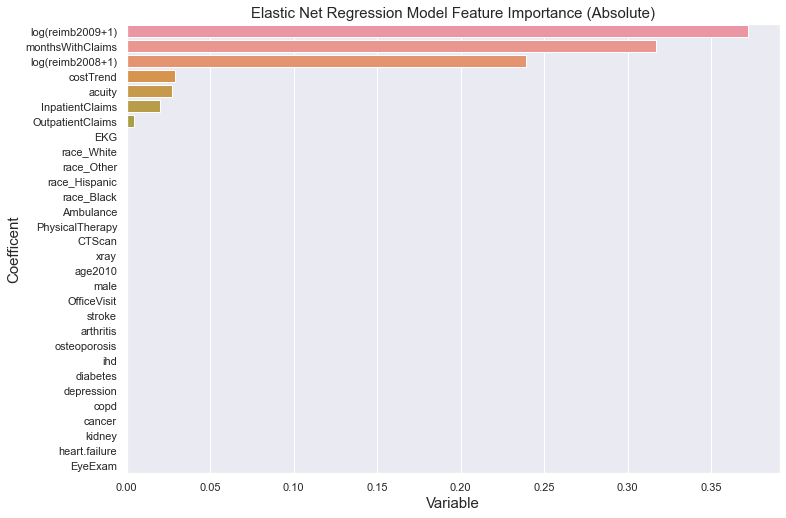

In [158]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Abs", data = coef_results_en, 
            order=coef_results_en.sort_values('Abs', ascending = False)["variable"])
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)
plt.title("Elastic Net Regression Model Feature Importance (Absolute)", size=15)
plt.savefig('EN_feature_imp_abs.jpg')

In [150]:
ev["Elastic Net"] = metrics(target_predict,test_targets,train_features,train_targets,en)

Bias: 0.63
Mean squared error: 0.63
RSS: 129751.28
Variance score: 0.59



## Linear Regression with the Most Important Parameters

In [151]:
name = 'Subset (Manual)'
sregr = linear_model.LinearRegression()

# Train on fewer coefficients. 
train_features_small = train.loc[:,['log(reimb2009+1)','log(reimb2008+1)','monthsWithClaims',
                                       'OfficeVisit', 'acuity', 'InpatientClaims']]
test_features_small = test.loc[:,['log(reimb2009+1)','log(reimb2008+1)','monthsWithClaims',
                                       'OfficeVisit', 'acuity', 'InpatientClaims']]
sregr.fit(train_features_small,train_targets)
target_predict_small = sregr.predict(test_features_small)

print('{}\n{}\n'.format(name,sregr.coef_))

ev['Subset (Manual)'] = metrics(target_predict_small,test_targets,train_features_small,train_targets,sregr)

Subset (Manual)
[ 0.43465436  0.20338559  0.03689392 -0.00892189 -0.44038475 -0.09338705]

Bias: 0.61
Mean squared error: 0.62
RSS: 126231.03
Variance score: 0.61



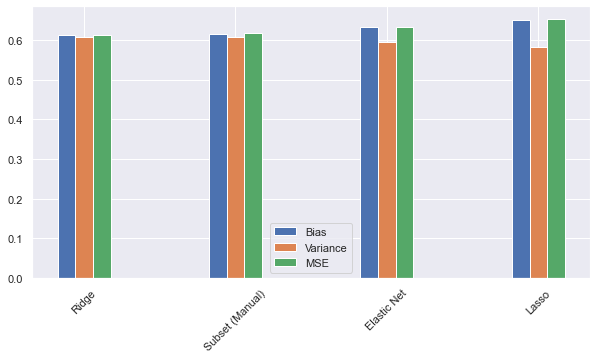

In [152]:
plt.rcParams['figure.figsize'] = [10, 5]

mdf = pd.DataFrame(ev).transpose()

mdf.index.name = 'Type'
mdf.rename(columns={0:'Bias',1:'MSE',2:'RSS',3:'Variance'},inplace=True)
mdf.sort_values(by=['Bias'],inplace=True)

labels = mdf.index.values
x = np.arange(len(labels))
width = 0.35  

fix, ax = plt.subplots()
rects = ax.bar(x - width/3, mdf['Bias'], width/3, label='Bias')
rects = ax.bar(x, mdf['Variance'], width/3, label='Variance')
rects = ax.bar(x + width/3, mdf['MSE'], width/3, label='MSE')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.show()